In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T
    return summ

In [3]:
data=[]
for i in range(1000):
    u=np.random.uniform()
    if u<1./3:
        data.append(np.random.normal(-2,1))
    elif u>=1./3 and u<2./3:
        data.append(np.random.normal())
    else:
        data.append(np.random.normal(2,1))
        
ned_data=(data-np.mean(data))/np.sqrt(np.var(data))

In [4]:
#(a)
def gibbs_mixture(y,mu_0,kappa,a_tau,b_tau,ite,H):
    N=len(y)
    #initialization
    n_h=[]
    pi_h=[]
    tau_h_sq=[[]]
    mu_h=[[]]
    pi_h=[[]]
    for h in xrange(H):
        n_h.append([1.*N/H])
        tau_h_sq[0].append(1.0)
        mu_h[0].append(0.0)
        pi_h[0].append(1./H)
    label=np.zeros(N).astype(int)
    components=np.arange(1,H+1)
    
    tau_h_sq=np.array(tau_h_sq)
    mu_h=np.array(mu_h)
    pi_h=np.array(pi_h)
    for i in xrange(ite):
        y_h=[]
        for h in xrange(H):
            y_h.append([])
        n_h=np.zeros(H)
        for j in xrange(N):
            Pr_z=pi_h[i]*sp.stats.norm.pdf(y[j],mu_h[i],np.sqrt(1./tau_h_sq[i]))/np.sum(pi_h[i]*sp.stats.norm.pdf(y[j],mu_h[i],np.sqrt(1./tau_h_sq[i])))
            label[j]=np.random.choice(components,p=Pr_z)
            n_h[label[j]-1]=n_h[label[j]-1]+1
            y_h[label[j]-1].append(y[j])
        y_h_bar=[]
        for h in xrange(H):
            y_h_bar.append(np.mean(y_h[h]))
        y_h_bar=np.array(y_h_bar)
        kappa_h_hat=1./(1./kappa+n_h)
        mu_h_hat=kappa_h_hat*(1./kappa_h_hat*mu_0+n_h*y_h_bar)
        a_h_hat=a_tau+n_h/2
        sum_h=[]
        pi_param=[]
        for h in xrange(H):
            sum_h.append(np.sum(np.square(y_h[h]-np.mean(y_h[h]))))
            pi_param.append(1./H+n_h[h])
        sum_h=np.array(sum_h)
        b_h_hat=b_tau+1./2*(sum_h+(n_h/(1+kappa*n_h))*np.square(y_h_bar-mu_0))
        tau_h_sq=np.vstack((tau_h_sq,sp.stats.invgamma.rvs(a=a_h_hat,scale=b_h_hat)))
        mu_h=np.vstack((mu_h,np.random.normal(mu_h_hat,np.sqrt(kappa_h_hat*tau_h_sq[i+1]))))
        pi_h=np.vstack((pi_h,np.random.dirichlet(pi_param)))
    return np.array([y_h,tau_h_sq.tolist(),mu_h.tolist(),pi_h.tolist()])
        
    
    

In [5]:
result1=gibbs_mixture(ned_data,0,1,2,4,500,2)

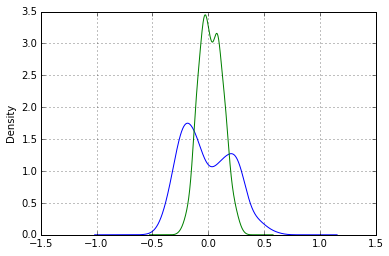

In [6]:
for i in range(2):
    Series(np.array(result1[2]).T[i]).plot(kind="kde")

In [11]:
result2=gibbs_mixture(ned_data,0,1,2,4,100,3)

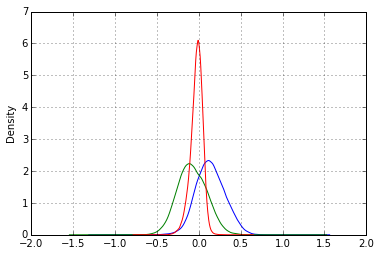

In [240]:
for i in range(3):
    Series(np.array(result2[2]).T[i]).plot(kind="kde")